In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('water_potability.csv')
dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
dataset.shape

(3276, 10)

In [4]:
dataset.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
cols = {'ph','Sulfate','Trihalomethanes'}
for col in cols :
    mean_col = dataset[col].mean()
    dataset[col].fillna(mean_col,inplace=True)

In [6]:
dataset.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [7]:
dataset.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Potability'}>, <Axes: >, <Axes: >]],
      dtype=object)

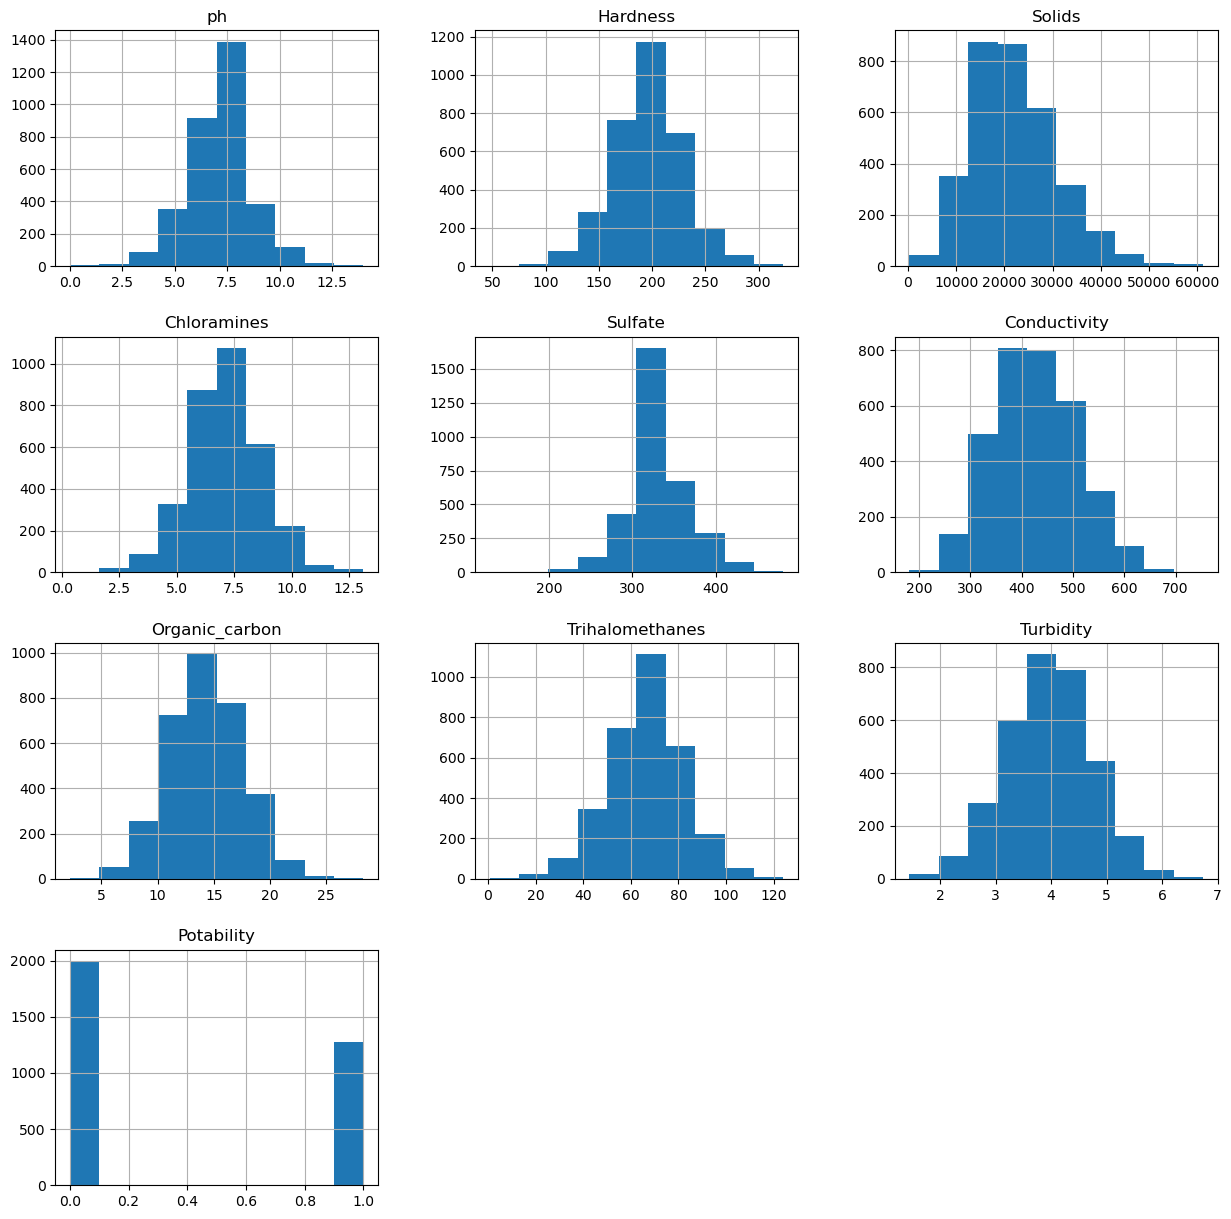

In [8]:
dataset.hist(figsize=(15,15))

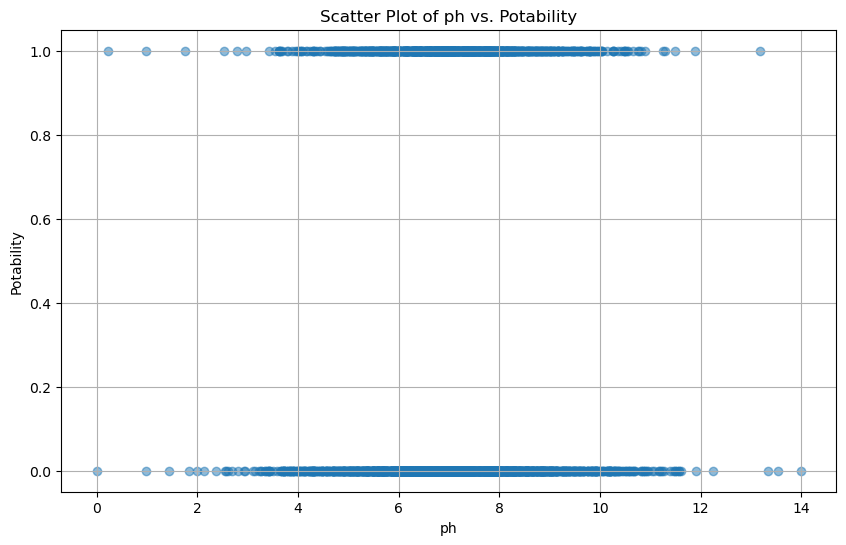

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset['ph'], dataset['Potability'], alpha=0.5)
plt.title('Scatter Plot of ph vs. Potability')
plt.xlabel('ph')
plt.ylabel('Potability')
plt.grid(True)
plt.show()

In [10]:
corr_matrix = dataset.corr()
corr_matrix['Potability'].sort_values()

Organic_carbon    -0.030001
Sulfate           -0.020619
Hardness          -0.013837
Conductivity      -0.008128
ph                -0.003287
Turbidity          0.001581
Trihalomethanes    0.006960
Chloramines        0.023779
Solids             0.033743
Potability         1.000000
Name: Potability, dtype: float64

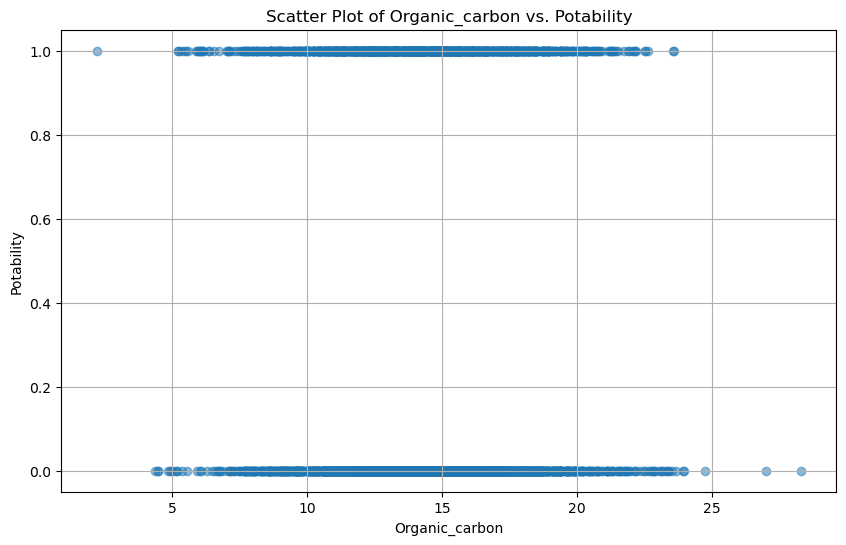

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Organic_carbon'], dataset['Potability'], alpha=0.5)
plt.title('Scatter Plot of Organic_carbon vs. Potability')
plt.xlabel('Organic_carbon')
plt.ylabel('Potability')
plt.grid(True)
plt.show()

In [12]:
X = dataset.drop(['Potability'],axis=1)
Y = dataset['Potability']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
pip_model = Pipeline([
    ('scalar',StandardScaler()),
    ('rfc',RandomForestClassifier(n_estimators=7,n_jobs=3,max_depth=8,random_state=76))
])

pip_model.fit(x_train,y_train)

model = RandomForestClassifier(n_estimators=7,n_jobs=3,max_depth=8,random_state=76)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=7, n_jobs=3, random_state=76)

In [20]:
pred = pip_model.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.6570121951219512

In [23]:
import tensorflow as tf

model.save('my_model.h5')

AttributeError: 'RandomForestClassifier' object has no attribute 'save'

In [24]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)